In [5]:
# Importar librerias para EDA y regresión logística
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ANALISIS EXPLORATORIO DE DATOS (EDA):

In [9]:
# Cargar el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Información general del dataset
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

In [11]:
# Estadísticas descriptivas
print("Estadísticas Descriptivas:")
print(df.describe().T)  # Transponer para mejor legibilidad

# Verificar valores nulos
nulos = df.isnull().sum()
print("\nConteo de Valores Nulos:")
print(nulos[nulos > 0])  # Mostrar solo columnas con valores nulos

Estadísticas Descriptivas:
           count        mean        std    min    25%    50%    75%    max
age        297.0   54.542088   9.049736   29.0   48.0   56.0   61.0   77.0
sex        297.0    0.676768   0.468500    0.0    0.0    1.0    1.0    1.0
cp         297.0    2.158249   0.964859    0.0    2.0    2.0    3.0    3.0
trestbps   297.0  131.693603  17.762806   94.0  120.0  130.0  140.0  200.0
chol       297.0  247.350168  51.997583  126.0  211.0  243.0  276.0  564.0
fbs        297.0    0.144781   0.352474    0.0    0.0    0.0    0.0    1.0
restecg    297.0    0.996633   0.994914    0.0    0.0    1.0    2.0    2.0
thalach    297.0  149.599327  22.941562   71.0  133.0  153.0  166.0  202.0
exang      297.0    0.326599   0.469761    0.0    0.0    0.0    1.0    1.0
oldpeak    297.0    1.055556   1.166123    0.0    0.0    0.8    1.6    6.2
slope      297.0    0.602694   0.618187    0.0    0.0    1.0    1.0    2.0
ca         297.0    0.676768   0.938965    0.0    0.0    0.0    1.0    3.

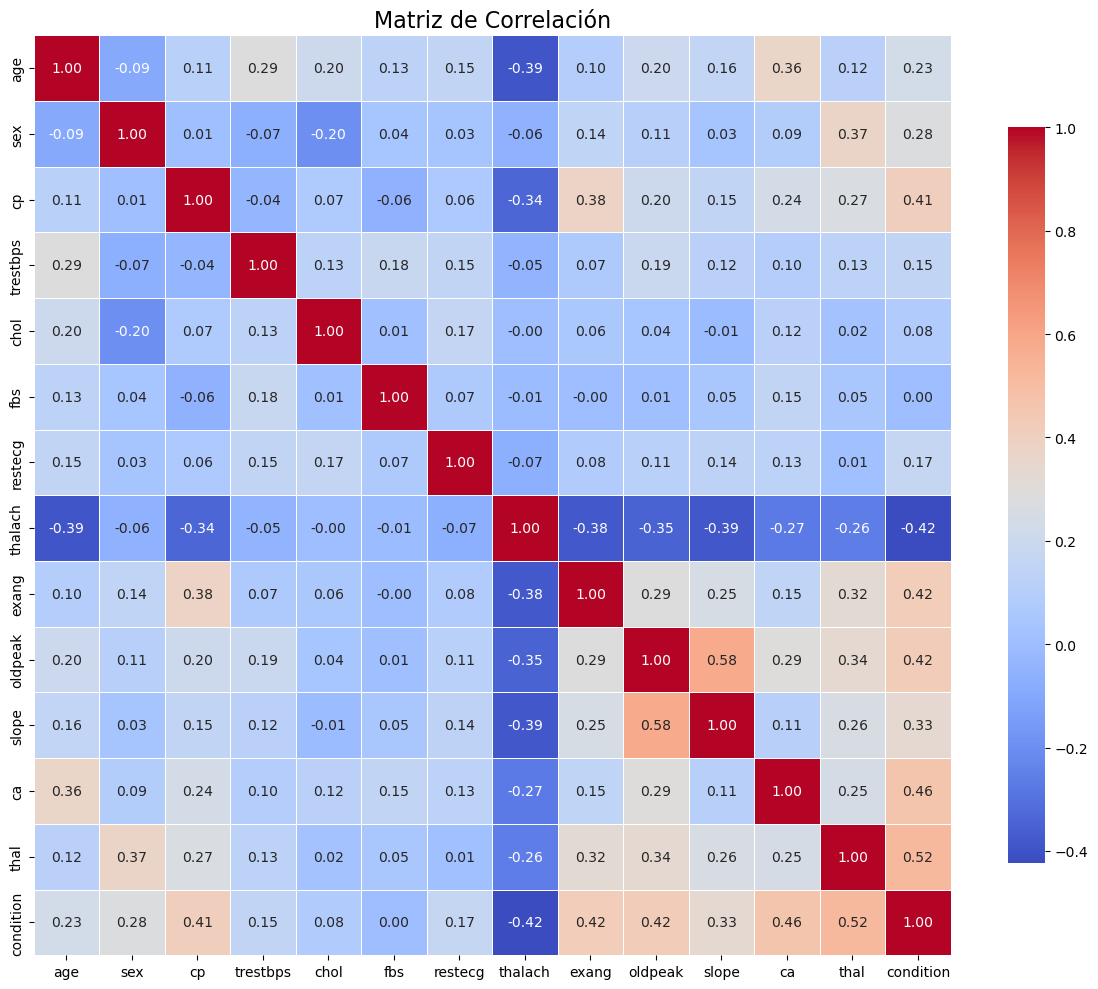

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
correlation_matrix = df.corr()

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear un heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,                 # Muestra los valores en las celdas
    cmap='coolwarm',           # Mapa de colores
    fmt=".2f",                 # Formato de los números
    linewidths=0.5,            # Ancho de las líneas que separan las celdas
    linecolor='white',         # Color de las líneas
    cbar_kws={"shrink": .8},  # Reducir el tamaño de la barra de color
)

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()                     # Ajustar diseño para evitar solapamiento
plt.show()

<Figure size 1500x1000 with 0 Axes>

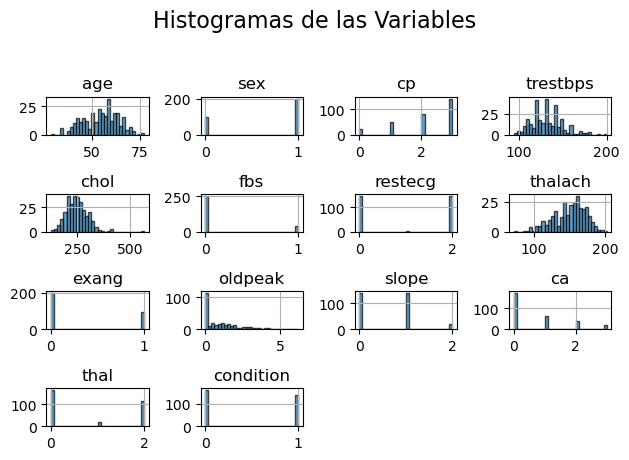

In [15]:
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear histogramas de todas las variables
df.hist(bins=30, edgecolor='black', alpha=0.7)

# Títulos y etiquetas
plt.suptitle('Histogramas de las Variables', fontsize=16)  # Título general
plt.xlabel('Valores', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Frecuencia', fontsize=12)  # Etiqueta para el eje y

# Ajustar diseño
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste para evitar solapamiento con el título
plt.show()

In [17]:
# Diccionario de datos del dataset
data_dictionary = {
    "Edad": {
        "Descripción": "Edad del paciente en años",
        "Tipo de dato": "Entero"
    },
    "Sexo": {
        "Descripción": "Sexo del paciente (1 = hombre, 0 = mujer)",
        "Tipo de dato": "Entero (binario)"
    },
    "cp": {
        "Descripción": "Tipo de dolor torácico",
        "Valores": {
            0: "Angina típica",
            1: "Angina atípica",
            2: "Dolor no anginoso",
            3: "Asintomático"
        },
        "Tipo de dato": "Entero"
    },
    "trestbps": {
        "Descripción": "Presión arterial en reposo (mm Hg al ingreso en el hospital)",
        "Tipo de dato": "Entero"
    },
    "chol": {
        "Descripción": "Colesterol sérico en mg/dl",
        "Tipo de dato": "Entero"
    },
    "fbs": {
        "Descripción": "Glucemia en ayunas > 120 mg/dl (1 = verdadero, 0 = falso)",
        "Tipo de dato": "Entero (binario)"
    },
    "restecg": {
        "Descripción": "Resultados electrocardiográficos en reposo",
        "Valores": {
            0: "Normal",
            1: "Anormalidad en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0.05 mV)",
            2: "Hipertrofia ventricular izquierda probable o definitiva según criterio de Estes"
        },
        "Tipo de dato": "Entero"
    },
    "thalach": {
        "Descripción": "Frecuencia cardíaca máxima alcanzada",
        "Tipo de dato": "Entero"
    },
    "exang": {
        "Descripción": "Angina inducida por el ejercicio (1 = sí, 0 = no)",
        "Tipo de dato": "Entero (binario)"
    },
    "oldpeak": {
        "Descripción": "Depresión del segmento ST inducida por el ejercicio en relación con el reposo",
        "Tipo de dato": "Decimal"
    },
    "pendiente": {
        "Descripción": "Pendiente del segmento ST en el ejercicio máximo",
        "Valores": {
            0: "Ascendente",
            1: "Plano",
            2: "Descendente"
        },
        "Tipo de dato": "Entero"
    },
    "ca": {
        "Descripción": "Número de vasos principales (0-3) coloreados por fluoroscopía",
        "Tipo de dato": "Entero"
    },
    "thal": {
        "Descripción": "Condición de thal",
        "Valores": {
            0: "Normal",
            1: "Defecto corregido",
            2: "Defecto reversible"
        },
        "Tipo de dato": "Entero"
    },
    "Condición": {
        "Descripción": "Presencia de enfermedad cardíaca (0 = sin enfermedad, 1 = enfermedad)",
        "Tipo de dato": "Entero (binario)"
    }
}

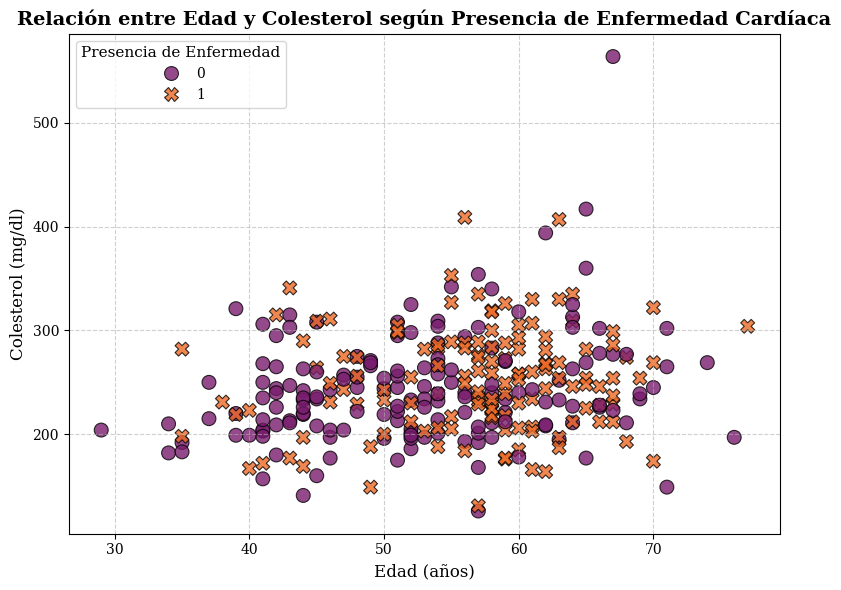

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Letra serif para scatter plots
plt.rcParams['font.family'] = 'serif'

# Configuración del tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el scatter plot
sns.scatterplot(
    x='age',
    y='chol',
    data=df,
    hue='condition',
    palette='inferno',
    style='condition',           # Añadir diferentes marcadores para condiciones
    s=100,                       # Tamaño de los puntos
    edgecolor='black',          # Bordes de los puntos para mejor visualización
    alpha=0.8                   # Transparencia de los puntos
)

# Títulos y etiquetas
plt.title('Relación entre Edad y Colesterol según Presencia de Enfermedad Cardíaca', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Colesterol (mg/dl)', fontsize=12)

# Leyenda
plt.legend(title='Presencia de Enfermedad', fontsize=10, title_fontsize='11')

# Añadir una cuadrícula
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


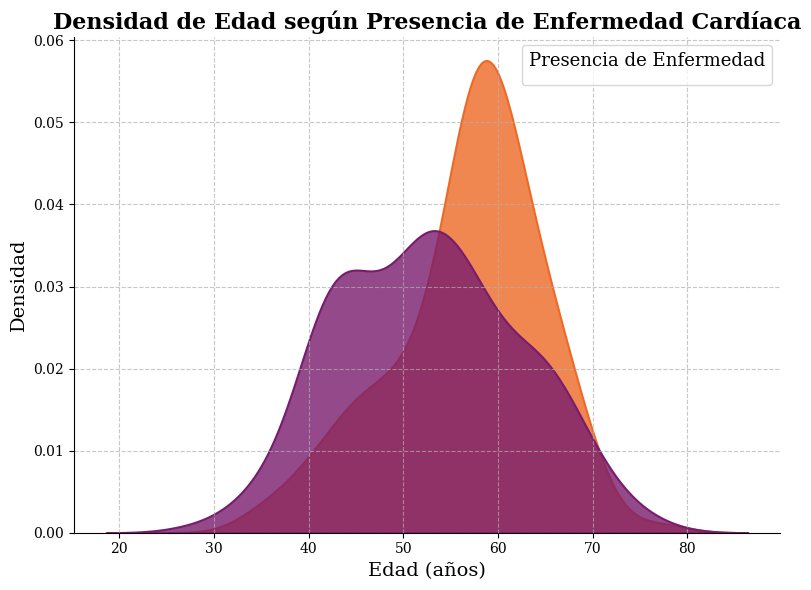

In [21]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Crear la gráfica de densidad con estilo moderno
plt.figure(figsize=(8, 6))

# Graficar la densidad
sns.kdeplot(
    data=df,
    x='age',
    hue='condition',
    fill=True,
    common_norm=False,
    palette='inferno',
    linewidth=1.5,
    alpha=0.8  # Ajustar la transparencia del relleno
)

# Títulos y etiquetas
plt.title('Densidad de Edad según Presencia de Enfermedad Cardíaca', fontsize=16, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Configurar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Leyenda
plt.legend(title='Presencia de Enfermedad', fontsize=12, title_fontsize='13')

# Eliminar bordes para un estilo más moderno
sns.despine()

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


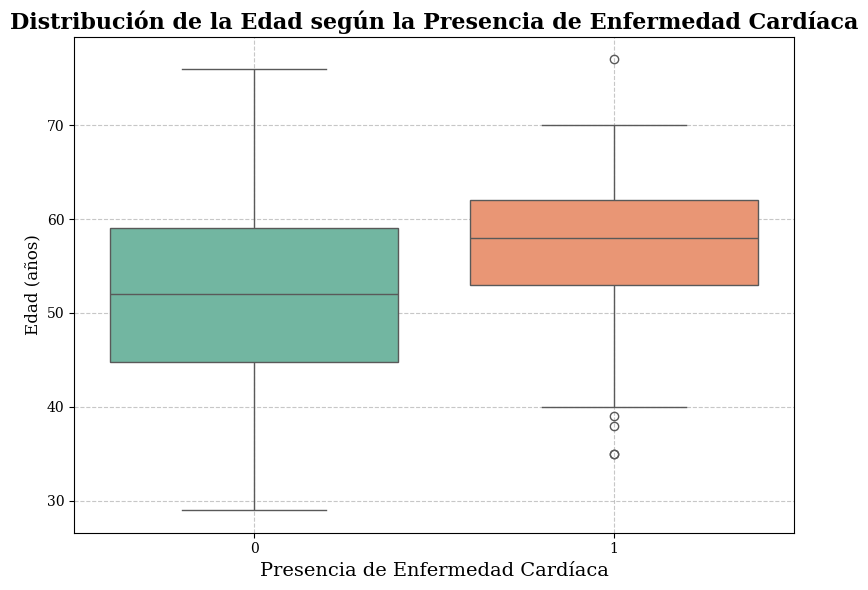

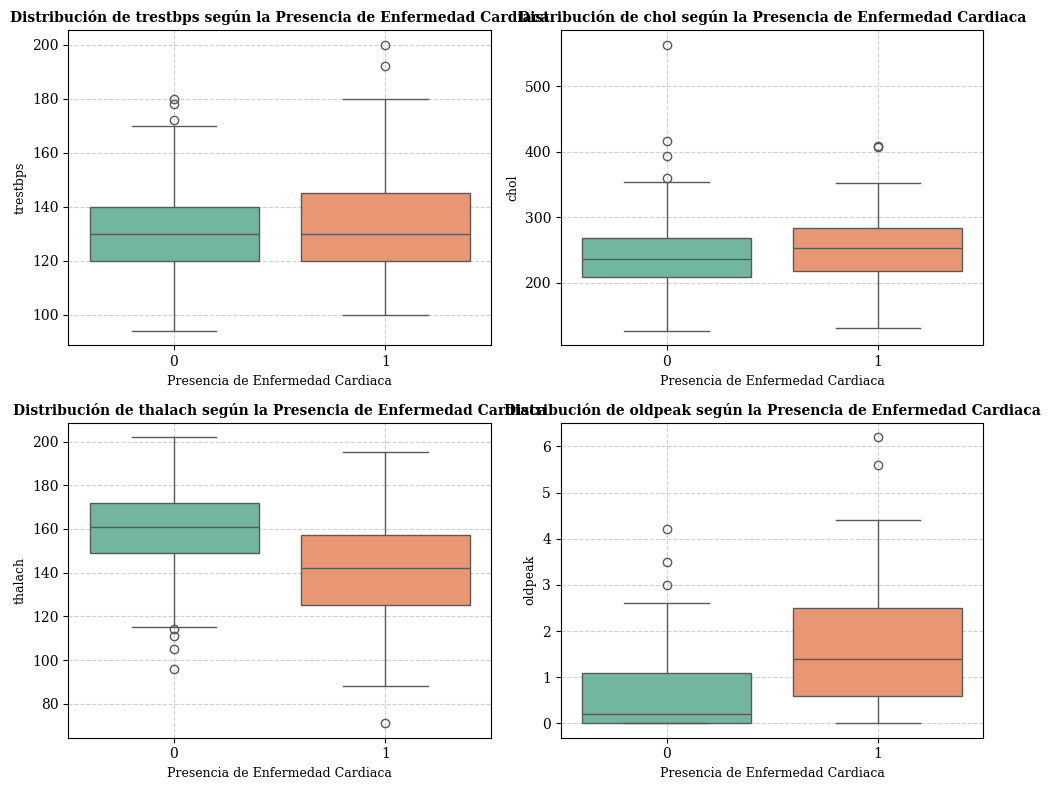

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de caja para la variable 'age'
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='age', data=df, palette='Set2')
plt.title('Distribución de la Edad según la Presencia de Enfermedad Cardíaca', fontsize=16, fontweight='bold')
plt.xlabel('Presencia de Enfermedad Cardíaca', fontsize=14)
plt.ylabel('Edad (años)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Agregar cuadrícula
plt.xticks(rotation=0)  # Alinear las etiquetas del eje x
plt.tight_layout()
plt.show()

# Crear un gráfico de caja para múltiples variables
numerical_features = ['trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='condition', y=feature, data=df, palette='Set2')
    plt.title(f'Distribución de {feature} según la Presencia de Enfermedad Cardiaca', fontsize=10, fontweight='bold')
    plt.xlabel('Presencia de Enfermedad Cardiaca', fontsize=9)
    plt.ylabel(feature, fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)  # Agregar cuadrícula

plt.tight_layout()
plt.show()

In [ ]:
REGRESIÓN LOGÍSTICA:

Matriz de Confusión:
[[22 10]
 [10 18]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        32
           1       0.64      0.64      0.64        28

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60

Precisión del modelo: 0.6666666666666666


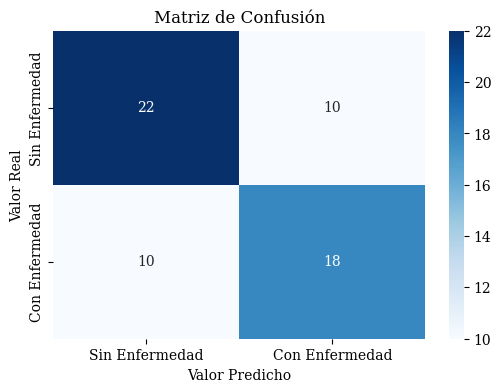

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df ya está definido y contiene las variables necesarias

# Definir las características (X) y la variable objetivo (y)
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]  # Ejemplo de características
y = df['condition']  # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sin Enfermedad', 'Con Enfermedad'], 
            yticklabels=['Sin Enfermedad', 'Con Enfermedad'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()